In [15]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np

In [16]:
pip install fast_ml

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pathlib
df='E:/Train Data'
df=pathlib.Path(df)

In [18]:
brain_images_dict = {
    't1': list(df.glob('t1/*')),
    't2': list(df.glob('t2/*')),
    'flair': list(df.glob('flair/*')),
    't1ce': list(df.glob('t1ce/*')),
    
}

In [19]:
brain_labels_dict = {
    't1': 0,
    't2': 1,
    'flair': 2,
    't1ce': 3,
    
}

In [20]:
x, y = [], []

for flower_name, images in brain_images_dict.items():
    for image in images:
        img = cv2.imread(str(image),cv2.IMREAD_GRAYSCALE)
        resized_img = cv2.resize(img,(256,256))
        x.append(resized_img)
        y.append(brain_labels_dict[flower_name])

In [21]:
np.shape(x)

(769, 256, 256)

In [22]:
import numpy as np
x=np.array(x)
y=np.array(y)

In [23]:
x=x.reshape(x.shape[0],256,256,1)

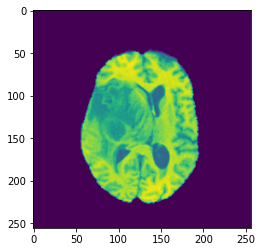

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x[0])

In [25]:
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split


In [26]:
train_ratio = 0.80
test_ratio = 0.10
validation_ratio = 0.10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio,stratify=y)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio),stratify=y_train)


In [27]:
np.shape(x)

(769, 256, 256, 1)

In [28]:
from tensorflow.keras.layers import Input, InputLayer, Dense, Flatten, Conv2D,Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import  Model
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, cv2
import random
import pywt
import scipy
from tensorflow import keras
def make_model():
    inputShape=(256,256,1)
    input1 = Input(inputShape)

    x = Conv2D(32,(3,3), name='layer_conv3', activation = 'relu', padding = 'same')(input1)
    x = MaxPooling2D((2,2), name = 'max_pool3')(x)
    #x = spark_module(x,'1', squeeze = 8, channels = 64)
    x = Conv2D(64,(3,3), name='layer_conv4', activation = 'relu')(x)
    x = MaxPooling2D((2,2), name = 'max_pool4')(x)
    #x = spark_module(x,'2', squeeze = 16, channels = 128)
    x = Conv2D(128,(3,3), name='layer_conv5', activation = 'relu')(x)
    x = MaxPooling2D((2,2), name = 'max_pool5')(x)
    #x = spark_module(x,'3', squeeze = 32, channels = 256)
    x = MaxPooling2D((2,2), name = 'max_pool6')(x)
    x = AveragePooling2D((7,7), name = 'avg_pool_1')(x)
    x = Flatten()(x)
    x = Dense(4, activation = 'softmax',name='op')(x)
    classifier = Model(inputs = input1, outputs = x, name = 'Predict')
    classifier.compile(optimizer = Adam(1e-3) , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])    
    return classifier


classifier = make_model()
classifier.summary()

Model: "Predict"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 layer_conv3 (Conv2D)        (None, 256, 256, 32)      320       
                                                                 
 max_pool3 (MaxPooling2D)    (None, 128, 128, 32)      0         
                                                                 
 layer_conv4 (Conv2D)        (None, 126, 126, 64)      18496     
                                                                 
 max_pool4 (MaxPooling2D)    (None, 63, 63, 64)        0         
                                                                 
 layer_conv5 (Conv2D)        (None, 61, 61, 128)       73856     
                                                                 
 max_pool5 (MaxPooling2D)    (None, 30, 30, 128)       0   

In [126]:
classifier.summary()

Model: "Predict"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 layer_conv3 (Conv2D)        (None, 256, 256, 32)      896       
                                                                 
 max_pool3 (MaxPooling2D)    (None, 128, 128, 32)      0         
                                                                 
 layer_conv4 (Conv2D)        (None, 126, 126, 64)      18496     
                                                                 
 max_pool4 (MaxPooling2D)    (None, 63, 63, 64)        0         
                                                                 
 layer_conv5 (Conv2D)        (None, 61, 61, 128)       73856     
                                                                 
 max_pool5 (MaxPooling2D)    (None, 30, 30, 128)       0   

In [29]:
x_train=x_train/255
x_test=x_test/255
x_valid=x_valid/255

In [30]:
classifier.fit(x_train,y_train,batch_size=8,validation_data=(x_valid,y_valid),epochs=50)

Epoch 1/50
77/77 [==============================] - 48s 457ms/step - loss: 1.3629 - accuracy: 0.2618 - val_loss: 1.3114 - val_accuracy: 0.2727
Epoch 2/50
77/77 [==============================] - 25s 324ms/step - loss: 1.1902 - accuracy: 0.4472 - val_loss: 1.0654 - val_accuracy: 0.5195
Epoch 3/50
77/77 [==============================] - 25s 323ms/step - loss: 1.0421 - accuracy: 0.5707 - val_loss: 1.0292 - val_accuracy: 0.6623
Epoch 4/50
77/77 [==============================] - 25s 323ms/step - loss: 1.0102 - accuracy: 0.5837 - val_loss: 0.9308 - val_accuracy: 0.6234
Epoch 5/50
77/77 [==============================] - 25s 323ms/step - loss: 0.9125 - accuracy: 0.6293 - val_loss: 0.8306 - val_accuracy: 0.7662
Epoch 6/50
77/77 [==============================] - 25s 323ms/step - loss: 0.7953 - accuracy: 0.6862 - val_loss: 0.7323 - val_accuracy: 0.7532
Epoch 7/50
77/77 [==============================] - 25s 323ms/step - loss: 0.7477 - accuracy: 0.7073 - val_loss: 0.9891 - val_accuracy: 0.5974

In [31]:
classifier.evaluate(x_test,y_test)

3/3 [==============================] - 15s 2s/step - loss: 0.2100 - accuracy: 0.9481


[0.20996809005737305, 0.948051929473877]